In [2]:
import csv
import numpy as np
from rdkit import Chem
from rdkit.Chem import Draw

In [3]:
csvfile = 'polymers_dataset.csv'
rows = []
fingerprints = []
nonzero_count = 0
with open(csvfile, 'r') as csv_file:
     csv_reader = csv.reader(csv_file, dialect='excel', delimiter=',')
     line_count = 0
     for row in csv_reader:
          if line_count == 0:
               pass
          else:
               rows.append([val for val in row[:3]])
               fingerprints.append([int(val) for val in row[3:]])
          line_count += 1


In [16]:
line_count = len(rows)
indices = np.arange(line_count)
indices_fin = np.arange(len(fingerprints))
np.random.shuffle(indices)
split_train = 80
split_validation = 10
split_test = 10
train_end = int(line_count * split_train / 100)
val_end = train_end + int(line_count * split_validation / 100)
train_end_fin = int(len(fingerprints) * split_train / 100)
val_end_fin = train_end_fin + int(len(fingerprints) * split_validation / 100)
# Split data
train = [rows[i] for i in indices[:train_end]]
validation = [rows[i] for i in indices[train_end:val_end]]
test = [rows[i] for i in indices[val_end:]]
# Fingerprint data
fin_rows = [fingerprints[i] for i in indices_fin[:]]
fin_train = [fingerprints[i] for i in indices_fin[:train_end_fin]]
fin_validation = [fingerprints[i] for i in indices_fin[train_end_fin:val_end_fin]]
fin_test = [fingerprints[i] for i in indices_fin[val_end_fin:]]
#Labels data
label_train = [train[i][2] for i in range(len(train))]
label_validation = [validation[i][2] for i in range(len(validation))]
label_test = [test[i][2] for i in range(len(test))]
label = [rows[i][2] for i in range(len(train+validation+test))]
#Change strings to integers
for i in range(len(label_train)):
    if label_train[i] == 'peptide':
        label_train[i] = 0
    if label_train[i] == 'plastic':
        label_train[i] = 1
    if label_train[i] == 'oligosaccharide':
        label_train[i] = 2
for i in range(len(label_validation)):
    if label_validation[i] == 'peptide':
        label_validation[i] = 0
    if label_validation[i] == 'plastic':
        label_validation[i] = 1
    if label_validation[i] == 'oligosaccharide':
        label_validation[i] = 2
for i in range(len(label_test)):
    if label_test[i] == 'peptide':
        label_test[i] = 0
    if label_test[i] == 'plastic':
        label_test[i] = 1
    if label_test[i] == 'oligosaccharide':
        label_test[i] = 2
for i in range(len(label)):
    if label[i] == 'peptide':
        label[i] = 0
    if label[i] == 'plastic':
        label[i] = 1
    if label[i] == 'oligosaccharide':
        label[i] = 2
print(len(train),len(validation),len(test),len(train)+len(validation)+len(test),len(rows))
print(test[len(test)-1])
print(label_validation)

16487 2060 2062 20609 20609
['9262', 'OC(=O)[C@]([H])(C1CCCN1)NC(=O)[C@]([H])(CC1=CNC=N1)NC(=O)[C@]([H])(CC(C)C)NC(=O)[C@]([H])(CC(C)C)NC(=O)[C@]([H])(C1CCCN1)N', 'peptide']
[2, 0, 0, 2, 1, 1, 0, 0, 1, 1, 2, 1, 1, 0, 0, 0, 0, 0, 2, 1, 0, 1, 0, 1, 1, 2, 2, 0, 2, 2, 0, 1, 1, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 2, 0, 1, 2, 0, 2, 2, 2, 0, 0, 0, 0, 2, 1, 1, 0, 0, 2, 0, 2, 1, 2, 1, 2, 2, 0, 1, 2, 0, 1, 1, 2, 2, 0, 1, 0, 1, 0, 0, 1, 1, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 0, 2, 2, 0, 2, 2, 1, 1, 2, 0, 1, 2, 0, 0, 0, 0, 2, 2, 2, 0, 0, 2, 1, 1, 0, 1, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 0, 0, 2, 2, 1, 2, 2, 2, 0, 0, 1, 1, 1, 2, 0, 1, 1, 1, 1, 2, 2, 1, 0, 2, 2, 0, 2, 0, 0, 0, 0, 0, 2, 1, 2, 0, 2, 1, 1, 0, 1, 2, 0, 0, 0, 1, 0, 0, 2, 0, 2, 0, 1, 2, 0, 0, 0, 1, 2, 1, 0, 1, 2, 0, 0, 1, 1, 0, 0, 0, 2, 1, 1, 2, 2, 0, 2, 0, 2, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 1, 0, 2, 2, 1, 1, 2, 0, 1, 1, 2, 1, 0, 0, 1, 0, 1, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 0, 0, 2, 1, 2, 0, 0, 1, 0, 2, 2, 2, 0, 1, 2, 

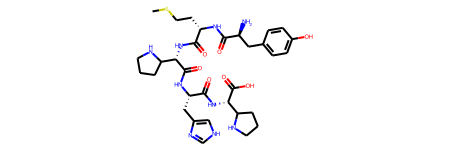

In [12]:
index = 1
mol = Chem.MolFromSmiles(train[index][1])
mol

In [44]:
# Import dependencies
import torch
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split

# Set the hyperparameters for data creation
NUM_CLASSES = 3
NUM_FEATURES = 2048
RANDOM_SEED = 42

# 1. Create multi-class data
#X_blob, y_blob = make_blobs(n_samples=1000,
#    n_features=NUM_FEATURES, # X features
#    centers=NUM_CLASSES, # y labels 
#   cluster_std=1.5, # give the clusters a little shake up (try changing this to 1.0, the default)
#    random_state=RANDOM_SEED
#)

# 2. Turn data into tensors
#X_blob = torch.from_numpy(fin_train).type(torch.float)
#y_blob = torch.from_numpy(label_train).type(torch.LongTensor)
print(fin_rows[0])
X_blob = torch.FloatTensor(fin_rows).type(torch.float)
y_blob = torch.FloatTensor(label).type(torch.LongTensor)
print(X_blob[:5], y_blob[:5])
print(X_blob.type(),y_blob.type())

# 3. Split into train and test sets
X_blob_train, X_blob_test, y_blob_train, y_blob_test = train_test_split(X_blob,
    y_blob,
    test_size=0.2,
    random_state=RANDOM_SEED
)

# 4. Plot data
#plt.figure(figsize=(10, 7))
#plt.scatter(X_blob[:, 0], X_blob[:, 1], c=y_blob, cmap=plt.cm.RdYlBu);

[0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 

In [45]:
from torch import nn

device = "cuda" if torch.cuda.is_available() else "cpu"

class BlobModel(nn.Module):
    def __init__(self, input_features, output_features, hidden_units=8):
        """Initializes all required hyperparameters for a multi-class classification model.

        Args:
            input_features (int): Number of input features to the model.
            out_features (int): Number of output features of the model
              (how many classes there are).
            hidden_units (int): Number of hidden units between layers, default 8.
        """
        super().__init__()
        self.linear_layer_stack = nn.Sequential(
            nn.Linear(in_features=input_features, out_features=128),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=128, out_features=16),
            nn.ReLU(), # <- does our dataset require non-linear layers? (try uncommenting and see if the results change)
            nn.Linear(in_features=16, out_features=output_features), # how many classes are there?
            nn.Softmax(dim=1)

        )
    
    def forward(self, x):
        x = self.linear_layer_stack(x)
        #x = x[0]*0 + x[1]*1 + x[2]*2
        return x

# Create an instance of BlobModel and send it to the target device
model_4 = BlobModel(input_features=NUM_FEATURES, 
                    output_features=NUM_CLASSES, 
                    hidden_units=64).to(device)
model_4

BlobModel(
  (linear_layer_stack): Sequential(
    (0): Linear(in_features=2048, out_features=128, bias=True)
    (1): ReLU()
    (2): Linear(in_features=128, out_features=16, bias=True)
    (3): ReLU()
    (4): Linear(in_features=16, out_features=3, bias=True)
    (5): Softmax(dim=1)
  )
)

In [52]:
# Create loss and optimizer
loss_fn = nn.CrossEntropyLoss()
#loss_fn = nn.MSELoss()
optimizer = torch.optim.SGD(model_4.parameters(), 
                            lr=0.1) # exercise: try changing the learning rate here and seeing what happens to the model's performance

In [53]:
# Perform a single forward pass on the data (we'll need to put it to the target device for it to work)
model_4(X_blob_train.to(device))[:5]

tensor([[0.5686, 0.2069, 0.2245],
        [0.5852, 0.2065, 0.2083],
        [0.3331, 0.3337, 0.3331],
        [0.3436, 0.3373, 0.3191],
        [0.2264, 0.2477, 0.5260]], grad_fn=<SliceBackward0>)

In [54]:
# How many elements in a single prediction sample?
model_4(X_blob_train.to(device))[0].shape, NUM_CLASSES 

(torch.Size([3]), 3)

In [55]:
# Make prediction logits with model
y_logits = model_4(X_blob_test.to(device))

print(y_logits)

# Perform softmax calculation on logits across dimension 1 to get prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1) 
print(y_logits[:5])
print(y_pred_probs[:5])

tensor([[0.3375, 0.3260, 0.3364],
        [0.1927, 0.2334, 0.5738],
        [0.2294, 0.2404, 0.5302],
        ...,
        [0.1582, 0.2117, 0.6301],
        [0.3284, 0.3344, 0.3372],
        [0.3521, 0.3377, 0.3102]], grad_fn=<SoftmaxBackward0>)
tensor([[0.3375, 0.3260, 0.3364],
        [0.1927, 0.2334, 0.5738],
        [0.2294, 0.2404, 0.5302],
        [0.1535, 0.2065, 0.6400],
        [0.5446, 0.2240, 0.2314]], grad_fn=<SliceBackward0>)
tensor([[0.3347, 0.3309, 0.3344],
        [0.2853, 0.2971, 0.4176],
        [0.2974, 0.3007, 0.4018],
        [0.2717, 0.2865, 0.4419],
        [0.4070, 0.2954, 0.2976]], grad_fn=<SliceBackward0>)


In [56]:
# Calculate accuracy (a classification metric)
def accuracy_fn(y_true, y_pred):
    correct = torch.eq(y_true, y_pred).sum().item() # torch.eq() calculates where two tensors are equal
    acc = (correct / len(y_pred)) * 100 
    return acc

In [57]:
# Fit the model
torch.manual_seed(42)

# Set number of epochs
epochs = 1000

# Put data to target device
X_blob_train, y_blob_train = X_blob_train.to(device), y_blob_train.to(device)
X_blob_test, y_blob_test = X_blob_test.to(device), y_blob_test.to(device)

for epoch in range(epochs):
    ### Training
    model_4.train()

    # 1. Forward pass
    y_logits = model_4(X_blob_train) # model outputs raw logits 
    y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1) # go from logits -> prediction probabilities -> prediction labels
    # print(y_logits)
    # 2. Calculate loss and accuracy
    loss = loss_fn(y_logits, y_blob_train) 
    acc = accuracy_fn(y_true=y_blob_train,
                      y_pred=y_pred)

    # 3. Optimizer zero grad
    optimizer.zero_grad()

    # 4. Loss backwards
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    ### Testing
    model_4.eval()
    with torch.inference_mode():
      # 1. Forward pass
      test_logits = model_4(X_blob_test)
      test_pred = torch.softmax(test_logits, dim=1).argmax(dim=1)
      # 2. Calculate test loss and accuracy
      test_loss = loss_fn(test_logits, y_blob_test)
      test_acc = accuracy_fn(y_true=y_blob_test,
                             y_pred=test_pred)
      
    if test_acc > 99.99:
       break
      

    # Print out what's happening
    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% | Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%") 

Epoch: 0 | Loss: 0.94192, Acc: 69.30% | Test Loss: 0.93313, Test Acc: 68.61%
Epoch: 10 | Loss: 0.82357, Acc: 76.87% | Test Loss: 0.81963, Test Acc: 77.80%
Epoch: 20 | Loss: 0.75853, Acc: 96.89% | Test Loss: 0.75987, Test Acc: 97.65%
Epoch: 30 | Loss: 0.72138, Acc: 99.92% | Test Loss: 0.72315, Test Acc: 99.98%


In [ ]:
# Make predictions
model_4.eval()
with torch.inference_mode():
    y_logits = model_4(X_blob_test)

# View the first 10 predictions
y_logits[:10]

tensor([1.0145, 0.9834, 1.0021])

In [77]:
# Turn predicted logits in prediction probabilities
y_pred_probs = torch.softmax(y_logits, dim=1)

# Turn prediction probabilities into prediction labels
y_preds = y_pred_probs.argmax(dim=1)

# Compare first 10 model preds and test labels
print(f"Predictions: {y_preds[:10]}\nLabels: {y_blob_test[:10]}")
print(f"Test accuracy: {accuracy_fn(y_true=y_blob_test, y_pred=y_preds)}%")

IndexError: Dimension out of range (expected to be in range of [-1, 0], but got 1)

In [78]:
def plot_decision_boundary(model: torch.nn.Module, X: torch.Tensor, y: torch.Tensor):
    """Plots decision boundaries of model predicting on X in comparison to y.

    Source - https://madewithml.com/courses/foundations/neural-networks/ (with modifications)
    """
    # Put everything to CPU (works better with NumPy + Matplotlib)
    model.to("cpu")
    X, y = X.to("cpu"), y.to("cpu")

    # Setup prediction boundaries and grid
    x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
    y_min, y_max = X[:, 1].min() - 0.1, X[:, 1].max() + 0.1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 101), np.linspace(y_min, y_max, 101))

    # Make features
    X_to_pred_on = torch.from_numpy(np.column_stack((xx.ravel(), yy.ravel()))).float()

    # Make predictions
    model.eval()
    with torch.inference_mode():
        y_logits = model(X_to_pred_on)

    # Test for multi-class or binary and adjust logits to prediction labels
    if len(torch.unique(y)) > 2:
        y_pred = torch.softmax(y_logits, dim=1).argmax(dim=1)  # mutli-class
    else:
        y_pred = torch.round(torch.sigmoid(y_logits))  # binary

    # Reshape preds and plot
    y_pred = y_pred.reshape(xx.shape).detach().numpy()
    plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

